In [62]:

import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version
import math # to help with data reshaping of the data

import numpy as np
import torch
#import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

# from sklearn.model_selection import train_test_split
import tqdm
import matplotlib.pyplot as plt
import logging

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

numpy: 1.21.5


In [63]:
torch.__version__

'1.10.0'

In [64]:
import os
os.chdir('../')

In [66]:
from benji_prox_dataloader import *
root_dir = 'D:/prox_data/PROXD_attempt2/PROXD'
in_frames = 10
pred_frames = 5
pd = proxDataset(root_dir, in_frames=in_frames, pred_frames=pred_frames, verbose=True)

dataloader = DataLoader(pd, batch_size=4,
                        shuffle=True, num_workers=0, collate_fn=my_collate)

In [67]:
stuff = pd.__getitem__(2000)

In [69]:
stuff[1][1][0]

{'camera_rotation': array([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]], dtype=float32),
 'camera_translation': array([[0., 0., 0.]], dtype=float32),
 'betas': array([[ 0.18027775, -0.8717183 ,  1.7174062 , -0.09956381,  0.30002666,
         -0.6386879 ,  0.5949405 ,  0.17490342, -0.10631422, -0.4518703 ]],
       dtype=float32),
 'global_orient': array([[-0.19057138,  1.5036881 , -2.8960476 ]], dtype=float32),
 'transl': array([[-0.4066951 ,  0.71829283,  1.510674  ]], dtype=float32),
 'left_hand_pose': array([[ 0.00244489,  0.00813151,  0.00417413,  0.00758163, -0.00274053,
         -0.0005635 , -0.00183734, -0.00042348, -0.00016505,  0.00023435,
         -0.00042363,  0.00070945]], dtype=float32),
 'right_hand_pose': array([[-0.06278228, -0.06552449,  0.03126841,  0.03041957,  0.06143547,
          0.033781  ,  0.04622062,  0.02504946,  0.00479418, -0.01623714,
          0.06481668, -0.02784302]], dtype=float32),
 'jaw_pose': array([[-0.00182979, -0.00027963,  0.000

In [13]:
self = pd
idx = 2098
seq_idx = np.digitize(idx, self.bounds)
assert seq_idx < len(self.bounds), "idx too big"
idx_in_seq = idx - (self.bounds[seq_idx-1] if seq_idx > 0 else 0)
start = idx_in_seq*self.tot_frames

in_frames_dicts = self.sequences[seq_idx][1][start:start+self.in_frames:1]
pred_frames_dicts = self.sequences[seq_idx][1][start+self.in_frames:start+self.tot_frames:1]
in_frames_fns = [frame_dict['fn'] for frame_dict in in_frames_dicts]
pred_frames_fns = [frame_dict['fn'] for frame_dict in pred_frames_dicts]


def load(fn):
    try:
        with open(fn, 'rb') as file:
            return pickle.load(file) 
    except FileNotFoundError:
        return None

def nans_of_shape(shape):
    out = np.empty(shape)
    out[:] = np.abs
    return out

in_data, pred_data = map(lambda fns: [load(fn) for fn in fns],  [in_frames_fns, pred_frames_fns])

In [14]:
in_frames_fns
in_data

['D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02911__00.01.37.003\\000.pkl',
 'D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02912__00.01.37.036\\000.pkl',
 'D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02913__00.01.37.070\\000.pkl',
 'D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02914__00.01.37.102\\000.pkl',
 'D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02915__00.01.37.139\\000.pkl',
 'D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02916__00.01.37.169\\000.pkl',
 'D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02917__00.01.37.201\\000.pkl',
 'D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02918__00.01.37.236\\000.pkl',
 'D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02919__00.01.3

[{'camera_rotation': array([[[1., 0., 0.],
          [0., 1., 0.],
          [0., 0., 1.]]], dtype=float32),
  'camera_translation': array([[0., 0., 0.]], dtype=float32),
  'betas': array([[-0.6387518 , -0.32014745,  0.5598045 , -0.2579955 ,  0.08565714,
          -0.20114422,  0.47912633,  0.07306933,  0.20813356,  0.0459968 ]],
        dtype=float32),
  'global_orient': array([[-0.09109784, -0.55160886,  3.0707147 ]], dtype=float32),
  'transl': array([[-2.1276882 ,  0.00446024,  3.2431786 ]], dtype=float32),
  'left_hand_pose': array([[-0.0128428 , -0.01061214, -0.00751931, -0.00757575,  0.00211687,
          -0.0001624 ,  0.00360943, -0.00242291,  0.00068849, -0.00094684,
           0.00318422, -0.00100048]], dtype=float32),
  'right_hand_pose': array([[-5.8118412e-03,  4.7094817e-03, -2.2435416e-03,  7.1145534e-03,
           2.0538245e-03,  5.6759763e-04,  1.5468204e-03, -5.7423062e-04,
          -4.6068268e-05, -3.3205599e-04,  1.0584807e-03,  6.8104011e-04]],
        dtype=floa

In [61]:
in_data

NameError: name 'in_data' is not defined

In [5]:
out = pd.__getitem__(2098)

In [10]:
out[1].shape
out[2].shape

(10, 21, 3)

(5, 21, 3)

In [7]:
out2 = pd.__getitem__(2100)

In [9]:
out2[1].shape
out2[2].shape

(10, 21, 3)

(5, 21, 3)

In [18]:
a = torch.tensor(out2[1][-1])
a.shape
c = a.tile((5,) + (1,)*len(a.shape))

torch.Size([21, 3])

In [19]:
c.shape

torch.Size([5, 21, 3])

In [17]:
(1,)*3

(1, 1, 1)

In [12]:
b = torch.tensor(np.arange(6).reshape(2, 3))

In [16]:
b
b.tile((5, 1, 1)).shape

tensor([[0, 1, 2],
        [3, 4, 5]], dtype=torch.int32)

torch.Size([5, 2, 3])

In [6]:
fn = 'D:\\prox_data\\PROXD_attempt2\\PROXD\\MPH1Library_00145_01\\results\\s001_frame_02920__00.01.37.300\\000.pkl'
def load(fn):
    try:
        with open(fn, 'rb') as file:
            return pickle.load(file) 
    except FileNotFoundError:
        return None

out = load(fn)

In [5]:
skels = []
indicess = []
for i, (indices, in_data, out_data) in tqdm.tqdm(enumerate(dataloader)):
    skels.append(in_data)
    indicess.append(indices)
    if i > 20:
        break

21it [00:10,  2.01it/s]


In [8]:
out is None

True

In [8]:
shapes = [x.shape for x in skels]
print(shapes)

[torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([3, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([3, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([3, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([3, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3]), torch.Size([4, 10, 21, 3])]


In [43]:
indicess[4]

tensor([  52, 3243, 2806, 4191])

In [46]:
torch.min(skels[4][2])

tensor(nan)

In [47]:
skels[4].shape

torch.Size([4, 10, 21, 3])

In [48]:
indicess[4][2]

tensor(2806)

In [49]:
stuff = pd.__getitem__(2806)

In [64]:
stuff[1].shape

(10, 21, 3)

In [8]:
~np.any(np.isnan(np.array([1., 2., 3., np.nan])))

False

In [68]:
torch.any(torch.isnan(torch.Tensor(stuff[1])))

tensor(True)

In [54]:
pd2 = proxDataset(root_dir, in_frames=in_frames, pred_frames=pred_frames, verbose=True)

In [55]:
stuff2 = pd2.__getitem__(2806)

In [62]:
stuff2[1][1][3]

{'camera_rotation': array([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]], dtype=float32),
 'camera_translation': array([[0., 0., 0.]], dtype=float32),
 'betas': array([[ 0.03005829,  0.15339045,  0.02018249, -0.05963836,  0.0873694 ,
         -0.23368923,  0.24680962, -0.07814113, -0.1449791 ,  0.02069059]],
       dtype=float32),
 'global_orient': array([[68.6841   ,  6.7822175,  5.197774 ]], dtype=float32),
 'transl': array([[ -21.308826,    4.871036, -329.66098 ]], dtype=float32),
 'left_hand_pose': array([[ 3.8294736e-02, -2.0652788e-02,  4.8157354e-03,  7.0870825e-04,
         -3.4706031e-03,  4.4368542e-04, -6.5146544e-04,  4.3167351e-03,
         -6.8400375e-04, -1.4739795e-05, -1.8339555e-03, -2.0008564e-03]],
       dtype=float32),
 'right_hand_pose': array([[-0.01416366, -0.03126711,  0.01870417, -0.01834237, -0.00290019,
         -0.01195062, -0.00258943,  0.01026381,  0.00102898,  0.0016169 ,
         -0.00821834,  0.0027965 ]], dtype=float32),
 'jaw_pose': 

In [58]:
stuff2[1][0][2]

'D:\\prox_data\\PROXD_attempt2\\PROXD\\N0SittingBooth_00169_02\\results\\s001_frame_00963__00.00.32.106\\000.pkl'

In [59]:
stuff2[1][1][2]

{'camera_rotation': array([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]], dtype=float32),
 'camera_translation': array([[0., 0., 0.]], dtype=float32),
 'betas': array([[ 0.03005829,  0.15339045,  0.02018249, -0.05963836,  0.0873694 ,
         -0.23368923,  0.24680962, -0.07814113, -0.1449791 ,  0.02069059]],
       dtype=float32),
 'global_orient': array([[nan, nan, nan]], dtype=float32),
 'transl': array([[nan, nan, nan]], dtype=float32),
 'left_hand_pose': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       dtype=float32),
 'right_hand_pose': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       dtype=float32),
 'jaw_pose': array([[nan, nan, nan]], dtype=float32),
 'leye_pose': array([[nan, nan, nan]], dtype=float32),
 'reye_pose': array([[nan, nan, nan]], dtype=float32),
 'expression': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32),
 'pose_embedding': array([[nan, nan, nan, nan, nan, nan, nan

In [60]:
fn = 'D:\\prox_data\\PROXD_attempt2\\PROXD\\N0SittingBooth_00169_02\\results\\s001_frame_00963__00.00.32.106\\000.pkl'
def load(fn):
    with open(fn, 'rb') as file:
        return pickle.load(file) 
pkl = load(fn)

In [61]:
pkl

{'camera_rotation': array([[[1., 0., 0.],
         [0., 1., 0.],
         [0., 0., 1.]]], dtype=float32),
 'camera_translation': array([[0., 0., 0.]], dtype=float32),
 'betas': array([[ 0.03005829,  0.15339045,  0.02018249, -0.05963836,  0.0873694 ,
         -0.23368923,  0.24680962, -0.07814113, -0.1449791 ,  0.02069059]],
       dtype=float32),
 'global_orient': array([[nan, nan, nan]], dtype=float32),
 'transl': array([[nan, nan, nan]], dtype=float32),
 'left_hand_pose': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       dtype=float32),
 'right_hand_pose': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]],
       dtype=float32),
 'jaw_pose': array([[nan, nan, nan]], dtype=float32),
 'leye_pose': array([[nan, nan, nan]], dtype=float32),
 'reye_pose': array([[nan, nan, nan]], dtype=float32),
 'expression': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]], dtype=float32),
 'pose_embedding': array([[nan, nan, nan, nan, nan, nan, nan

In [42]:
for i in skels:
    print(torch.min(i))

tensor(-2.7390)
tensor(-1.2192)
tensor(-1.3386)
tensor(-2.1691)
tensor(nan)
tensor(-1.3955)
tensor(-1.3835)
tensor(-1.5473)
tensor(-1.5721)
tensor(-2.0045)
tensor(-1.2582)
tensor(-1.2380)
tensor(-1.8391)
tensor(-1.3567)
tensor(-1.5257)
tensor(-1.4269)
tensor(-1.4248)
tensor(-1.3947)
tensor(-1.3133)
tensor(-1.1754)
tensor(-1.3264)
tensor(-1.9922)


In [33]:
from benji_prox_dataloader import *
root_dir = 'D:/prox_data/PROXD_attempt2/PROXD'
in_frames = 10
pred_frames = 5
pd = proxDataset(root_dir, in_frames=in_frames, pred_frames=pred_frames, verbose=True)

dataloader = DataLoader(pd, batch_size=4,
                        shuffle=True, num_workers=0)

In [34]:
skels = []
indicess = []
for i, (indices, (in_frames_dicts, in_data), (out_frames_dicts, out_data)) in enumerate(dataloader):
    skels.append(in_data)
    indicess.append(indices)
    if i > 20:
        break

In [20]:
skels = []
indicess = []
for i, (indices, (in_frames_dicts, in_data), (out_frames_dicts, out_data)) in enumerate(dataloader):
    skels.append(in_data)
    indicess.append(indices)
    if i > 20:
        break

In [7]:
def f(mylist):
    return [torch.min(x['body_pose']) for x in mylist]

In [35]:
for i, x in enumerate(skels):
    print(i, f(x))

0 [tensor(-2.0716), tensor(-2.0716), tensor(-2.0716), tensor(-2.0731), tensor(-2.0669), tensor(-2.0666), tensor(-2.0695), tensor(-2.0564), tensor(-2.0693), tensor(-2.0748)]
1 [tensor(-1.3528), tensor(-1.4270), tensor(-1.3697), tensor(-1.4349), tensor(-1.5377), tensor(-1.5429), tensor(-1.5307), tensor(-1.5971), tensor(-1.6269), tensor(-1.6487)]
2 [tensor(-1.2608), tensor(-1.2494), tensor(-1.3221), tensor(-1.2984), tensor(-1.3036), tensor(-1.3261), tensor(-1.3415), tensor(-1.3419), tensor(-1.3693), tensor(-1.3733)]
3 [tensor(-1.6593), tensor(-1.5989), tensor(-1.5617), tensor(-1.5805), tensor(-1.5357), tensor(-1.5669), tensor(-1.5485), tensor(-1.5856), tensor(-1.5485), tensor(-1.5461)]
4 [tensor(-1.5886), tensor(-1.5776), tensor(-1.5844), tensor(-1.5841), tensor(-1.5848), tensor(-1.5854), tensor(-1.5868), tensor(-1.5868), tensor(-1.5864), tensor(-1.5717)]
5 [tensor(-1.5549), tensor(-1.3817), tensor(-1.4833), tensor(-1.4142), tensor(-1.1570), tensor(-1.3821), tensor(-1.2173), tensor(-1.221

In [11]:
torch.min(skels[0][0]['body_pose'])

tensor(-1.1843)

In [14]:
f(skels[1])

[tensor(-1.1505),
 tensor(-1.2040),
 tensor(nan),
 tensor(-1.1925),
 tensor(-1.3158),
 tensor(-1.3250),
 tensor(-1.3465),
 tensor(-1.3285),
 tensor(-1.3320),
 tensor(-1.3749)]

In [15]:
skels[1][1]

{'camera_rotation': tensor([[[[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.]]],
 
 
         [[[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.]]],
 
 
         [[[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.]]],
 
 
         [[[1., 0., 0.],
           [0., 1., 0.],
           [0., 0., 1.]]]]),
 'camera_translation': tensor([[[0., 0., 0.]],
 
         [[0., 0., 0.]],
 
         [[0., 0., 0.]],
 
         [[0., 0., 0.]]]),
 'betas': tensor([[[-0.4013,  0.4582,  1.0548,  0.2423,  0.3644, -0.6015,  0.7832,
            0.2530, -0.0525, -0.3158]],
 
         [[-0.3170, -0.6254,  1.0331,  0.0279,  0.3117, -0.1956,  0.4798,
           -0.0875,  0.0438, -0.3795]],
 
         [[-0.6623, -1.2540,  0.7926, -0.1069,  0.1125,  0.1251,  0.4069,
            0.2095,  0.2422, -0.1229]],
 
         [[ 0.0037, -2.1284,  1.8193,  0.2582,  0.6501, -0.4245,  0.6370,
            0.3441, -0.1300, -0.6517]]]),
 'global_orient': tensor([[[ 2.8575,  0.1556,  1.0525]],

In [30]:
np.where(np.isnan(skels[1][2]['body_pose'].numpy()))

(array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], dtype=int64))

In [26]:
a = skels[1][2]['body_pose'].numpy()

(4, 1, 63)

In [68]:
class MockupModel(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, num_layers: int, output_size: np.ndarray, seq_len):
        super().__init__()

        self.hidden_size = hidden_size
        self.seq_len = seq_len
        self.input_size = input_size
        self.output_size=output_size

        self.model = nn.ModuleDict({
            'lstm': nn.LSTM(input_size=np.product(input_size), hidden_size=hidden_size, num_layers=num_layers, batch_first=True),
            'linear': nn.Linear(in_features=hidden_size*seq_len, out_features=np.product(output_size))})  # is this correct?l

    def forward(self, input):
        # From [batches, seqs, seq len, features]
        # to [seq len, batch data, features]
        logging.debug(f'input: {input.shape}')
        input = input.reshape(-1, self.seq_len, self.input_size)
        logging.debug(f'input trans: {input.shape}')

       
        # Data is fed to the LSTM
        out, (h_n, c_n) = self.model['lstm'](input)
        logging.debug(f'h_n: {h_n.shape}; c_n: {c_n.shape}')
        logging.debug(f'lstm out: {out.shape}')


        # in_bs = input.shape[1]
        out = out.reshape(-1, self.seq_len*self.hidden_size)
        logging.debug(f'linear in: {out.shape}')
        out = self.model['linear'](out)
        logging.debug(f'linear out: {out.shape}')
        return out.reshape((-1,) + self.output_size)


In [39]:
in_skels.reshape((40, 63)).shape

torch.Size([40, 63])

In [57]:
rnn = MockupModel(input_size=21*3, hidden_size=10, num_layers=1, output_size=(pred_frames, 21, 3), seq_len=in_frames)

self = rnn
input = in_skels
input.shape
input = input.reshape(-1, self.seq_len, np.product(self.input_size))
input.shape

torch.Size([4, 10, 21, 3])

torch.Size([4, 10, 63])

In [58]:
out, (h_n, c_n) = self.model['lstm'](input)

In [59]:
out = out.reshape(-1, self.seq_len*self.hidden_size)
out.shape

torch.Size([4, 100])

In [60]:
out = self.model['linear'](out)
out.shape

torch.Size([4, 315])

In [65]:
out2 = out.reshape((-1,) + self.output_size)

In [41]:
logging.basicConfig(level=logging.DEBUG)
asdf = MockupModel(input_size=1, hidden_size=10, num_layers=1, output_size=1, seq_len=7)
out = asdf(torch.tensor(X_train[:15]).float())
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(level=logging.INFO)
asdf = MockupModel(input_size=1, hidden_size=10, num_layers=2, output_size=1, seq_len=7)
out = asdf(torch.tensor(X_train[:15]).float())

DEBUG:root:input: torch.Size([15, 7, 1])
DEBUG:root:input trans: torch.Size([15, 7, 1])
DEBUG:root:h_n: torch.Size([1, 15, 10]); c_n: torch.Size([1, 15, 10])
DEBUG:root:lstm out: torch.Size([15, 7, 10])
DEBUG:root:linear in: torch.Size([15, 70])
DEBUG:root:linear out: torch.Size([15, 1])


In [44]:
criterion = nn.MSELoss()
learning_rate=0.00001
losses = []

rnn = MockupModel(input_size=(21, 3), hidden_size=10, num_layers=1, output_size=(pred_frames, 21, 3), seq_len=in_frames)

n_iter = 300
bs = 30

In [23]:
indices, in_skels, pred_skels = next(iter(dataloader))

In [26]:
indices
in_skels.shape
pred_skels.shape

tensor([ 547, 3224,  104, 3969])

torch.Size([4, 10, 21, 3])

torch.Size([4, 5, 21, 3])

In [43]:
in_skels.shape

torch.Size([4, 10, 21, 3])

In [96]:
skels = []
indicess = []
for i, (indices, in_skels, pred_skels) in enumerate(dataloader):
    skels.append(in_skels)
    indicess.append(indices)
    if i > 20:
        break

In [83]:
skels2 = np.array([x.numpy() for x in skels])

In [97]:
skels2.shape
np.min(skels2)
np.max(skels2)
for i in skels2:
    print(np.min(i))

(22, 4, 10, 21, 3)

nan

nan

-1.6090757
-2.0953004
-1.3213171
-1.291373
-1.7668184
-1.9145813
-1.480337
-1.4967444
-1.7193991
-1.9705664
-1.3088351
-1.4191784
-1.3043078
-1.413487
-1.9928335
-1.3549649
nan
-1.7311441
-1.3418766
-1.940191
nan
nan


In [99]:
for j in skels2[-1][1]:
    print(np.min(j))

-1.3864751
-1.3922439
-1.3938974
-1.4574133
-1.4883049
-1.4436889
-1.4996016
-1.4938364
nan
-1.5181234


In [101]:
skels2[-1][1][8]

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]], dtype=float32)

In [102]:
skels2.shape

(22, 4, 10, 21, 3)

In [103]:
indicess[-1]

tensor([1892, 4371, 4219, 3644])

In [104]:
pd.bounds

array([ 105,  250,  402,  546,  691,  788,  915, 1037, 1153, 1239, 1321,
       1438, 1537, 1656, 1757, 1904, 2134, 2232, 2436, 2571, 2669, 2742,
       2824, 2896, 2986, 3188, 3284, 3435, 3575, 3639, 3686, 3741, 3784,
       3857, 3887, 3931, 3996, 4139, 4228, 4378, 4551, 4755, 4890, 5026,
       5092, 5180, 5267, 5394, 5464, 5522, 5582, 5642, 5774, 5876],
      dtype=int32)

In [120]:
a, b, c = pd.__getitem__(4371)

In [126]:
indicess[-1][1]

tensor(4371)

In [123]:
skels2[-1][1][0]

array([[ 0.40115538,  0.11037332,  0.04926322],
       [-0.15928772, -0.06139543, -0.14330442],
       [-0.00673045, -0.12405459,  0.07027291],
       [-0.32483363, -0.22923759, -0.09317331],
       [ 0.2558079 , -0.02375936,  0.09837273],
       [-0.07613914, -0.01093929,  0.08755545],
       [-0.03545065, -0.13576552, -0.00696851],
       [-0.11779847,  0.21062675,  0.06657875],
       [ 0.01691256, -0.03924043,  0.01867311],
       [-0.02844869, -0.02125734, -0.01851358],
       [-0.02209398,  0.04689351,  0.04365112],
       [ 0.15206209,  0.09241921, -0.08355288],
       [ 0.01436452, -0.05141786,  0.09846146],
       [ 0.00241605, -0.17262147, -0.03294793],
       [-0.10158391,  0.09982353, -0.1267685 ],
       [ 0.1638143 , -0.19817069, -0.12338901],
       [ 0.14501792, -0.17308544, -0.19334257],
       [ 0.28211206,  0.31007144, -0.5402465 ],
       [ 0.40551975,  0.41526666,  0.09109486],
       [-0.10626768,  0.00396374,  0.2451494 ],
       [ 0.16271171,  0.10572561, -0.404

In [122]:
b[0]

array([[-0.02873363, -0.13687406, -0.16311924],
       [-0.04950591,  0.08767055,  0.07606058],
       [ 0.17740469,  0.00196072, -0.02523178],
       [ 0.26343265, -0.0355691 ,  0.13420948],
       [ 0.24544469,  0.02546768, -0.16047983],
       [-0.12510304, -0.02028702, -0.02702631],
       [-0.1883126 ,  0.5256852 ,  0.1575036 ],
       [ 0.07694496, -0.47359374,  0.09633508],
       [ 0.13544099,  0.01567918, -0.02743619],
       [ 0.0350327 ,  0.02473282,  0.04163745],
       [-0.05141444, -0.01008937, -0.0722738 ],
       [ 0.29227683, -0.36764336,  0.06623716],
       [ 0.01632382,  0.1735293 ,  0.0625868 ],
       [-0.05988497,  0.05706851, -0.15829635],
       [ 0.20286813, -0.43498915,  0.06947143],
       [ 0.06691684, -0.21850774, -1.2630861 ],
       [ 0.20224074,  0.30507228,  1.3304372 ],
       [ 0.29829317, -0.67983   ,  0.45974234],
       [ 0.31831095,  0.2683052 , -0.09396741],
       [ 0.02616498, -0.14832173,  0.1736972 ],
       [-0.00193045,  0.02278643, -0.140

In [106]:
idx = 4371
seq_idx = np.digitize(idx, pd.bounds)
assert seq_idx < len(pd.bounds), "idx too big"
idx_in_seq = idx - (pd.bounds[seq_idx-1] if seq_idx > 0 else 0)
start = idx_in_seq*pd.tot_frames

in_frames_dicts = pd.sequences[seq_idx][1][start:start+pd.in_frames:1]
pred_frames_dicts = pd.sequences[seq_idx][1][start+pd.in_frames:start+pd.tot_frames:1]
in_frames_fns = [frame_dict['fn'] for frame_dict in in_frames_dicts]
pred_frames_fns = [frame_dict['fn'] for frame_dict in pred_frames_dicts]

In [119]:
len(in_frames_dicts)

10

In [111]:
in_frames_dicts[8]
in_frames_dicts[9]

{'fn': 'D:\\prox_data\\PROXD_attempt2\\PROXD\\N3Office_00139_02\\results\\s001_frame_02154__00.01.11.774\\000.pkl',
 'frame': 2154,
 'tstamp': datetime.time(0, 1, 11, 774000)}

{'fn': 'D:\\prox_data\\PROXD_attempt2\\PROXD\\N3Office_00139_02\\results\\s001_frame_02155__00.01.11.809\\000.pkl',
 'frame': 2155,
 'tstamp': datetime.time(0, 1, 11, 809000)}

In [113]:
def load(fn):
    with open(fn, 'rb') as file:
        return pickle.load(file)

In [115]:
temp2 = load('D:\\prox_data\\PROXD_attempt2\\PROXD\\N3Office_00139_02\\results\\s001_frame_02155__00.01.11.809\\000.pkl')

In [114]:
temp = load('D:\\prox_data\\PROXD_attempt2\\PROXD\\N3Office_00139_02\\results\\s001_frame_02154__00.01.11.774\\000.pkl')

In [118]:
np.min(temp2['body_pose'])

-1.3262948

In [117]:
temp['body_pose']

array([[-2.27149017e-03, -1.83375135e-01, -1.83082923e-01,
        -6.00441881e-02,  1.37758285e-01,  1.04078203e-01,
         2.06524134e-01, -3.14865005e-03, -2.74391789e-02,
         2.46995091e-01, -1.01357132e-01,  1.58970386e-01,
         3.07680607e-01,  6.89812303e-02, -1.78756595e-01,
        -1.91871494e-01, -1.78404246e-02, -4.69176751e-03,
        -1.83978319e-01,  5.61888158e-01,  1.78273693e-01,
         1.16088845e-01, -5.03942907e-01,  1.31525278e-01,
         2.02717006e-01,  1.03932647e-02, -9.48280934e-03,
         2.89925262e-02,  1.66944973e-02,  4.40060347e-02,
        -5.28419465e-02,  4.19179443e-04, -6.96102753e-02,
         2.69410431e-01, -3.88545662e-01,  9.25373435e-02,
         3.58741321e-02,  2.43011490e-01,  1.97459832e-01,
        -9.82366949e-02,  3.67906014e-03, -2.55123138e-01,
         2.34313145e-01, -5.06056905e-01,  9.18998718e-02,
         1.02168530e-01, -2.31632829e-01, -1.32965839e+00,
         2.38423333e-01,  3.81473243e-01,  1.41853654e+0

In [94]:
skels2.shape

(22, 4, 10, 21, 3)

In [74]:
criterion = nn.MSELoss()
learning_rate=0.00001
losses = []

rnn = MockupModel(input_size=21*3, hidden_size=10, num_layers=1, output_size=(pred_frames, 21, 3), seq_len=in_frames)

n_iter = 1
bs = 30
i = 0

for i, (indices, in_skels, pred_skels) in enumerate(dataloader):
    output = rnn(in_skels)
    loss = criterion(output, pred_skels)
    loss.backward()
    for p in rnn.parameters():
        _ = p.data.add_(p.grad.data, alpha=-learning_rate)
    losses.append(loss.item())
    print(i, loss)


plt.plot(losses)
print(losses[-4:])

0 tensor(0.3329, grad_fn=<MseLossBackward0>)
1 tensor(0.1075, grad_fn=<MseLossBackward0>)
2 tensor(nan, grad_fn=<MseLossBackward0>)
3 tensor(nan, grad_fn=<MseLossBackward0>)
4 tensor(nan, grad_fn=<MseLossBackward0>)
5 tensor(nan, grad_fn=<MseLossBackward0>)
6 tensor(nan, grad_fn=<MseLossBackward0>)
7 tensor(nan, grad_fn=<MseLossBackward0>)


KeyboardInterrupt: 

In [72]:
losses

[0.14992986619472504,
 0.18565291166305542,
 0.18947391211986542,
 0.13525918126106262,
 0.3510498106479645,
 0.11608334630727768,
 0.13458845019340515,
 0.091218963265419,
 0.23499557375907898,
 0.24295581877231598,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [50]:
xin = df2.MedTemp[:7].array
def predict(xin):
    # hidden = rnn.initHidden()
    out = rnn(torch.tensor(xin).float().reshape(1, -1))
    yout = out.detach().numpy()
    return yout




<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

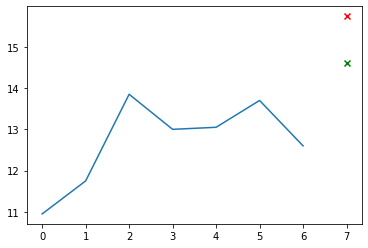

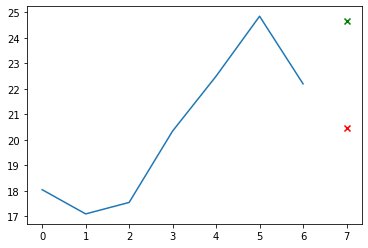

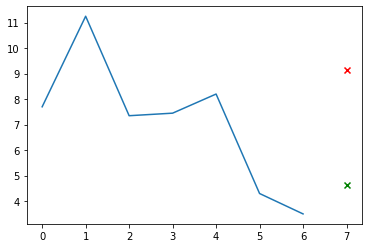

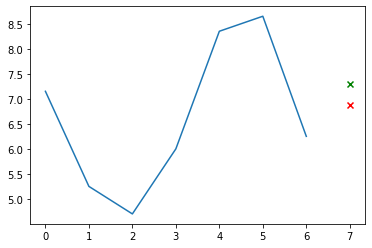

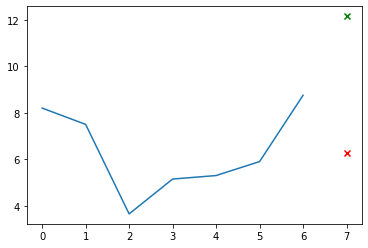

In [51]:
def plot(xin, ypred, ytrue):
    plt.plot(xin)
    plt.scatter(len(xin), ypred, color='r', marker='x')
    plt.scatter(len(xin), ytrue, color='g', marker='x')


for i in range(10, 15):
    xin = X_test[i]
    ypred = predict(xin)
    ytrue = Y_test[i]
    plt.figure()
    plot(xin, ypred, ytrue)


In [50]:
xin

<PandasArray>
[             16.15,              20.45, 18.549999999999997,
               14.4, 11.850000000000001, 11.549999999999999,
 12.149999999999999]
Length: 7, dtype: float64

In [ ]:
3